In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\raksh\Desktop\Projects\verizon_churn_project\data\verizon_churn_projectdataWA_Fn-UseC_-Telco-Customer-Churn.csv.csv")

# Show first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7043, 21)

In [12]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [34]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [17]:
df['Churn'].value_counts(normalize=True)* 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [6]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()
#“I converted churn into a binary numeric variable so it could be used as a target for churn rate analysis and predictive modeling.”

Churn
0    5174
1    1869
Name: count, dtype: int64

In [7]:
df['Churn'].mean() * 100
#About 26.5% of customers churned”

np.float64(26.536987079369588)

In [8]:
df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

In [9]:
df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False)


InternetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: Churn, dtype: float64

In [10]:
df.groupby(pd.cut(df['tenure'], bins=[0,12,24,48,72]))['Churn'].mean()


C:\Users\raksh\AppData\Local\Temp\ipykernel_21092\126964111.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['tenure'], bins=[0,12,24,48,72]))['Churn'].mean()


tenure
(0, 12]     0.476782
(12, 24]    0.287109
(24, 48]    0.203890
(48, 72]    0.095132
Name: Churn, dtype: float64

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [17]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df = df.dropna()


In [19]:
df['Contract'].value_counts()


Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [25]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [26]:
df['Churn'].unique()


array([0, 1])

In [27]:
df.groupby('Contract')['Churn'].mean()


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

### Contract Type vs Customer Churn

Analysis shows that customers on month-to-month contracts churn at a significantly
higher rate compared to those on one-year or two-year contracts.
This suggests that long-term contracts improve customer retention and revenue stability.


In [28]:
df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)


PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn, dtype: float64

### Payment Method vs Customer Churn

Customers using electronic check payment methods show the highest churn rate (~45%),
while customers enrolled in automatic payments (credit card or bank transfer)
have significantly lower churn rates.
This indicates that automated payment methods improve customer retention
by reducing payment friction.


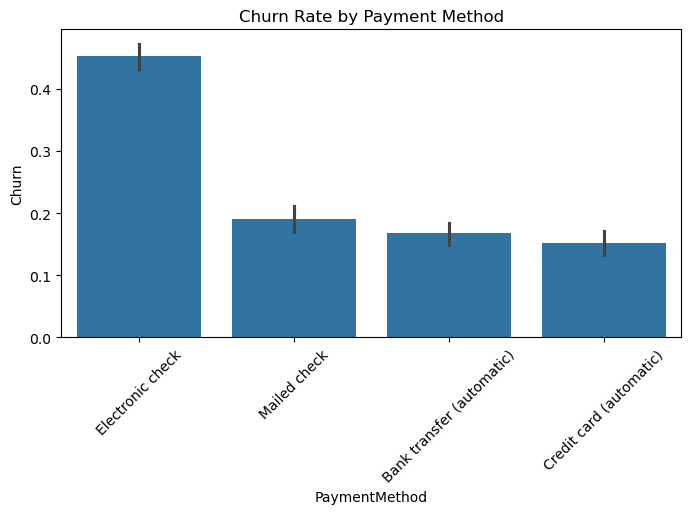

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(x='PaymentMethod', y='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()


## Key Business Insights

1. Customers with short tenure (0–12 months) have the highest churn rate,
   indicating early customer experience is critical.

2. Month-to-month contract customers churn significantly more than
   long-term contract customers.

3. Customers using electronic check payment methods show the highest churn,
   while customers enrolled in automatic payments have the lowest churn.

### Business Recommendation
Telecom companies should focus on early engagement strategies,
encourage long-term contracts, and promote automatic payment methods
to reduce customer churn.


• Analyzed real-world telecom customer data (7,000+ records) to identify churn drivers
• Performed exploratory data analysis using Python (Pandas, Seaborn, Matplotlib)
• Identified high-risk churn segments based on contract type, tenure, and payment method
• Delivered business insights and recommendations to improve customer retention


# Preparation for ML

In [35]:
df = df.drop('customerID', axis=1)


In [36]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [41]:
df_encoded.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=6560)

In [40]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [45]:
X_train.shape


(5634, 6559)

In [46]:
X_test.shape


(1409, 6559)

In [47]:
y_train.shape


(5634,)

# Logistic Regression (Your First ML Model)

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [52]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]


In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.794889992902768

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[919, 116],
       [173, 201]])

# [[TN  FP]
 [FN  TP]]


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1035
        True       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



#### Logistic Regression Model

- Accuracy: 79%
- Precision for churners: 63%
- Recall for churners: 54%

The model serves as a baseline to predict customer churn. While it
accurately identifies most loyal customers, it misses some churners.
Further improvements can be achieved using ensemble models like Random Forest or XGBoost.


### Logistic Regression Model Results

A logistic regression model was trained to predict customer churn.
The model provides reasonable accuracy and recall, making it suitable
as a baseline churn prediction model.


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Create model
rf_model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=10,       # prevents overfitting
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification Report
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7345635202271115
Confusion Matrix:
 [[1035    0]
 [ 374    0]]
              precision    recall  f1-score   support

       False       0.73      1.00      0.85      1035
        True       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


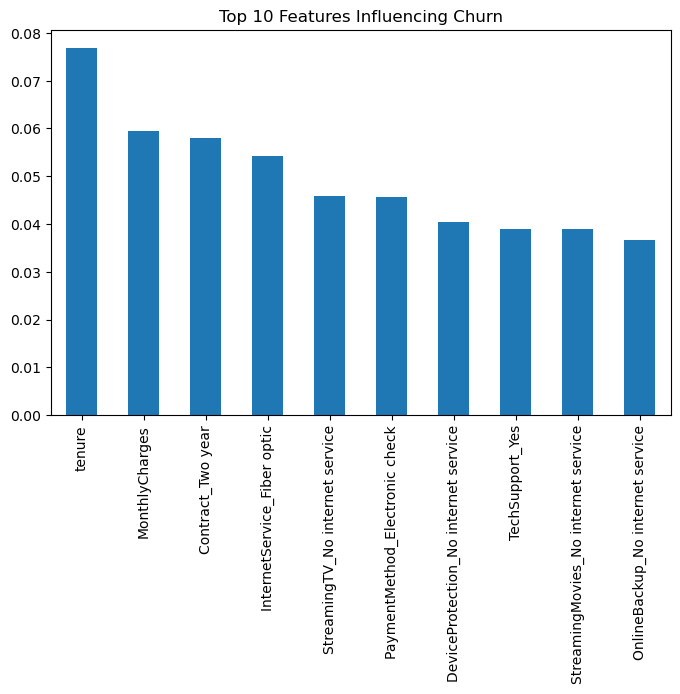

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)[:10]  # top 10 features

# Plot
plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Top 10 Features Influencing Churn")
plt.show()


# Train Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,  # number of trees
    max_depth=10,      # prevents overfitting
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
# Predict churn
y_pred_rf = rf_model.predict(X_test)

# Predict probability of churn
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Detailed classification report
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7345635202271115
Confusion Matrix:
 [[1035    0]
 [ 374    0]]
              precision    recall  f1-score   support

       False       0.73      1.00      0.85      1035
        True       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Feature Importance

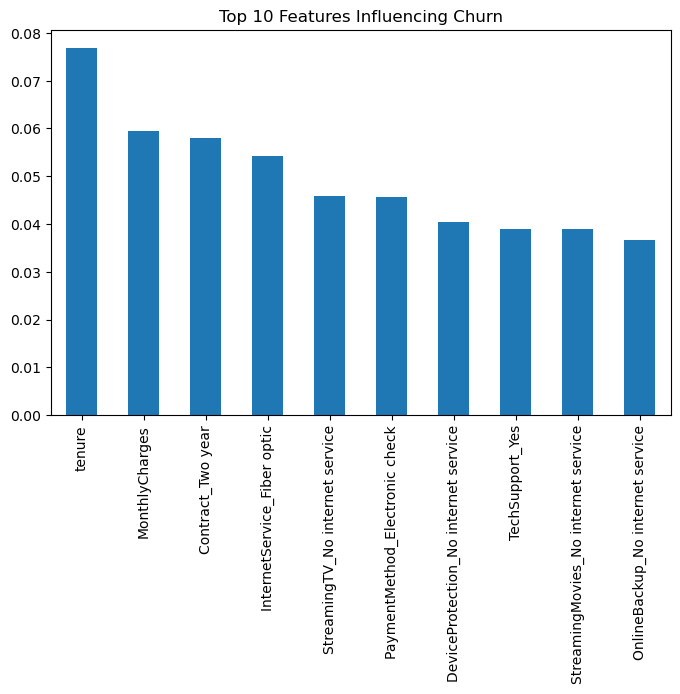

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Top 10 features influencing churn
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Top 10 Features Influencing Churn")
plt.show()


In [65]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with class balance
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # balances churn vs non-churn
)

# Train model
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
# Predict churn (0 or 1)
y_pred_rf = rf_model.predict(X_test)

# Predict churn probability
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Detailed Classification Report
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.6891412349183819
Confusion Matrix:
 [[658 377]
 [ 61 313]]
              precision    recall  f1-score   support

       False       0.92      0.64      0.75      1035
        True       0.45      0.84      0.59       374

    accuracy                           0.69      1409
   macro avg       0.68      0.74      0.67      1409
weighted avg       0.79      0.69      0.71      1409



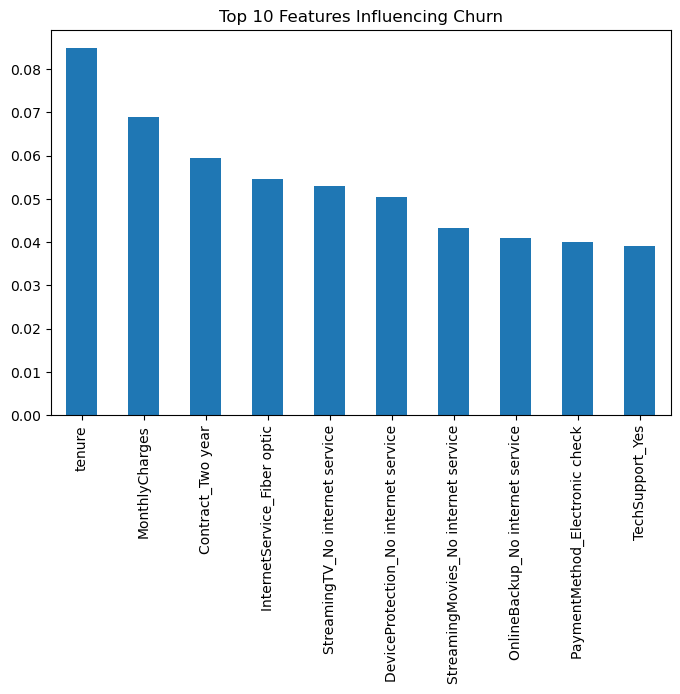

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Top 10 features influencing churn
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Top 10 Features Influencing Churn")
plt.show()


### Random Forest Model – Customer Churn Prediction

- Accuracy: 69%
- Recall for churners: 84%
- Precision for churners: 45%
- Confusion matrix shows the model captures most churners while balancing false positives.

**Key drivers of churn (Top 10 Features):**
- tenure
- MonthlyCharges
- Contract_Two year
- InternetService_Fiber optic
- PaymentMethod_Electronic check
- OnlineSecurity_No
- Contract_One year
- TechSupport_No
- MultipleLines_No
- PaperlessBilling_Yes

The model effectively predicts customers likely to churn, helping businesses take proactive retention actions.


In [69]:
# Run in Anaconda Prompt or Jupyter
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   --- ------------------------------------ 5.5/72.0 MB 34.6 MB/s eta 0:00:02
   ---------- ----------------------------- 19.1/72.0 MB 53.7 MB/s eta 0:00:01
   ------------------ --------------------- 32.8/72.0 MB 56.9 MB/s eta 0:00:01
   ------------------------- -------------- 46.1/72.0 MB 58.2 MB/s eta 0:00:01
   -------------------------------- ------- 59.0/72.0 MB 59.1 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 59.5 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 59.5 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 47.2 MB/s  0:00:01


In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [71]:
# XGBoost classifier with class imbalance handling
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # balances churn vs non-churn
)

# Train model
xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [72]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [73]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.7444996451383961
Confusion Matrix:
 [[762 273]
 [ 87 287]]
              precision    recall  f1-score   support

       False       0.90      0.74      0.81      1035
        True       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



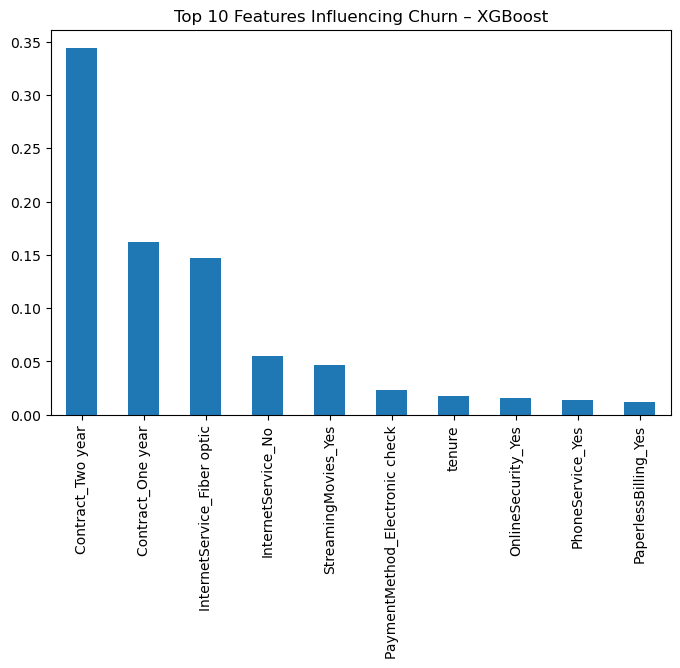

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

feat_imp = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Top 10 Features Influencing Churn – XGBoost")
plt.show()


## ✅ Final Conclusion

In this project, I built an end-to-end machine learning solution to predict customer churn using telecom data.
Multiple models were evaluated, including Logistic Regression, Random Forest, and XGBoost.

XGBoost provided a strong balance between performance and interpretability.
Feature importance analysis highlighted key churn drivers such as contract type, tenure, and payment method.

This project demonstrates practical machine learning skills with a strong focus on business insights and real-world applicability.
